In [1]:
# Import Dependencies
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# pull in cleaned data, make it a df
datafile = "Data/NIHmergedwithCOVIDdata.csv"

base_df = pd.read_csv(datafile)

base_df

,Unnamed: 0,Year,Month,State,Beverage Type,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange,index,positive,totalTestResults,Positivity Rate,Shutdown Length
0,0,2017,1,Alaska,Spirits,103645,42598,593378,0.0718,NaN,NaN,NaN,NaN,NaN,0.00,0
1,1,2017,1,Arkansas,Spirits,402885,165586,2455022,0.0674,NaN,NaN,NaN,NaN,NaN,0.00,0
2,2,2017,1,Colorado,Spirits,733857,301615,4634346,0.0651,NaN,NaN,NaN,NaN,NaN,0.00,31
3,3,2017,1,Connecticut,Spirits,412100,169373,3015481,0.0562,NaN,NaN,NaN,NaN,NaN,0.00,0
4,4,2017,1,Florida,Spirits,2770686,1138752,17722275,0.0643,NaN,NaN,NaN,NaN,NaN,0.00,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,1833,2020,6,Massachusetts,Beer,10335283,465088,5862386,0.0793,0.0913,-0.1312,190.0,108882.0,1103550.0,9.87,55
1834,1834,2020,6,Missouri,Beer,11099851,499493,5077875,0.0984,0.1056,-0.0682,222.0,21551.0,424214.0,5.08,27
1835,1835,2020,6,North Dakota,Beer,2091390,94113,617880,0.1523,0.1664,-0.0844,295.0,3574.0,178468.0,2.00,0
1836,1836,2020,6,Oregon,Beer,7969948,358648,3547474,0.1011,0.1135,-0.1092,327.0,8656.0,237634.0,3.64,0


In [3]:
# remove data from months not included in all data
monthlist = [3,4,5,6]
monthrelevant_df = base_df.loc[base_df['Month'].map(lambda x: x in monthlist),:].reset_index()


monthrelevant_df

,level_0,Unnamed: 0,Year,Month,State,Beverage Type,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange,index,positive,totalTestResults,Positivity Rate,Shutdown Length
0,88,88,2017,3,Alaska,Spirits,141033,57964,593378,0.0977,NaN,NaN,NaN,NaN,NaN,0.00,0
1,89,89,2017,3,Arkansas,Spirits,289006,118781,2455022,0.0484,NaN,NaN,NaN,NaN,NaN,0.00,0
2,90,90,2017,3,Colorado,Spirits,1154429,474470,4634346,0.1024,NaN,NaN,NaN,NaN,NaN,0.00,31
3,91,91,2017,3,Connecticut,Spirits,581433,238969,3015481,0.0792,NaN,NaN,NaN,NaN,NaN,0.00,0
4,92,92,2017,3,Florida,Spirits,4217222,1733278,17722275,0.0978,NaN,NaN,NaN,NaN,NaN,0.00,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,1833,1833,2020,6,Massachusetts,Beer,10335283,465088,5862386,0.0793,0.0913,-0.1312,190.0,108882.0,1103550.0,9.87,55
690,1834,1834,2020,6,Missouri,Beer,11099851,499493,5077875,0.0984,0.1056,-0.0682,222.0,21551.0,424214.0,5.08,27
691,1835,1835,2020,6,North Dakota,Beer,2091390,94113,617880,0.1523,0.1664,-0.0844,295.0,3574.0,178468.0,2.00,0
692,1836,1836,2020,6,Oregon,Beer,7969948,358648,3547474,0.1011,0.1135,-0.1092,327.0,8656.0,237634.0,3.64,0


In [4]:
# use only necessary columns
monthrelevant_df = monthrelevant_df[['Year','Month','State','Ethanol','Population','Shutdown Length','Positivity Rate']]

monthrelevant_df

,Year,Month,State,Ethanol,Population,Shutdown Length,Positivity Rate
0,2017,3,Alaska,57964,593378,0,0.00
1,2017,3,Arkansas,118781,2455022,0,0.00
2,2017,3,Colorado,474470,4634346,31,0.00
3,2017,3,Connecticut,238969,3015481,0,0.00
4,2017,3,Florida,1733278,17722275,31,0.00
...,...,...,...,...,...,...,...
689,2020,6,Massachusetts,465088,5862386,55,9.87
690,2020,6,Missouri,499493,5077875,27,5.08
691,2020,6,North Dakota,94113,617880,0,2.00
692,2020,6,Oregon,358648,3547474,0,3.64


In [5]:
# groupby State/Year/Month in order to combine beverage types into their sums
year_groupby = monthrelevant_df.groupby(['Year','State'])

ethanol2 = year_groupby['Ethanol'].sum()
population2 = year_groupby['Population'].max()
shutdown2 = year_groupby['Shutdown Length'].max()
percapita2 = ethanol2/population2

grouped_df = pd.DataFrame({"Ethanol": ethanol2,
                                          "Population": population2,
                                          "Shutdown Length": shutdown2,
                                          "Per Capita Consumption": percapita2})

grouped_df = grouped_df.reset_index()

grouped_df

,Year,State,Ethanol,Population,Shutdown Length,Per Capita Consumption
0,2017,Alaska,598164,593378,0,1.008066
1,2017,Arkansas,1449680,2455022,0,0.590496
2,2017,Colorado,4616704,4634346,31,0.996193
3,2017,Connecticut,2555639,3015481,0,0.847506
4,2017,Florida,16531938,17722275,31,0.932834
...,...,...,...,...,...,...
59,2020,North Dakota,699408,617880,0,1.131948
60,2020,Oregon,1876993,3547474,0,0.529107
61,2020,Texas,18233596,23257363,28,0.783992
62,2020,Virginia,4851935,7094962,0,0.683856


In [6]:
#splitting data into 2017-19 and 2020
After_df = grouped_df.loc[grouped_df['Year'] == 2020,:].reset_index()
Before_df = grouped_df.loc[(grouped_df['Year'] == 2017)|(grouped_df['Year'] == 2018)|(grouped_df['Year'] == 2019),:].reset_index()

After_df['Per Capita After'] = After_df['Per Capita Consumption']
After_df = After_df[['State','Per Capita After','Shutdown Length']]

After_df

,State,Per Capita After,Shutdown Length
0,Alaska,0.986497,0
1,Arkansas,0.623286,0
2,Colorado,0.740326,31
3,Connecticut,0.370593,0
4,Florida,0.926596,31
5,Illinois,0.808750,70
6,Kansas,0.631155,35
7,Kentucky,0.690946,0
8,Louisiana,0.470263,46
9,Massachusetts,0.911014,55


In [7]:
# group 2017-19 data by month (year irrelevant)
before_groupby = Before_df.groupby(['State'])

ethanol3 = before_groupby['Ethanol'].sum()
population3 = before_groupby['Population'].sum()
percapita3 = ethanol3/population3

combinedBefore_df = pd.DataFrame({"Ethanol": ethanol3,
                                          "Population": population3,
                                          "Per Capita Before": percapita3})

combinedBefore_df = combinedBefore_df.reset_index()

combinedBefore_df

,State,Ethanol,Population,Per Capita Before
0,Alaska,1790553,1773619,1.009548
1,Arkansas,4474961,7396406,0.605018
2,Colorado,13711576,14139532,0.969733
3,Connecticut,7517876,9053819,0.830354
4,Florida,49909936,53910584,0.925791
5,Illinois,26615836,31601950,0.842221
6,Kansas,4229893,7091946,0.596436
7,Kentucky,7261012,11043383,0.657499
8,Louisiana,5139712,11410187,0.450449
9,Massachusetts,16531138,17522338,0.943432


In [8]:
# merge dfs again to get easy-to-use series
final_df = pd.merge(combinedBefore_df, After_df, how='inner')
final_df = final_df[['State','Per Capita Before','Per Capita After','Shutdown Length']]

final_df

,State,Per Capita Before,Per Capita After,Shutdown Length
0,Alaska,1.009548,0.986497,0
1,Arkansas,0.605018,0.623286,0
2,Colorado,0.969733,0.740326,31
3,Connecticut,0.830354,0.370593,0
4,Florida,0.925791,0.926596,31
5,Illinois,0.842221,0.808750,70
6,Kansas,0.596436,0.631155,35
7,Kentucky,0.657499,0.690946,0
8,Louisiana,0.450449,0.470263,46
9,Massachusetts,0.943432,0.911014,55


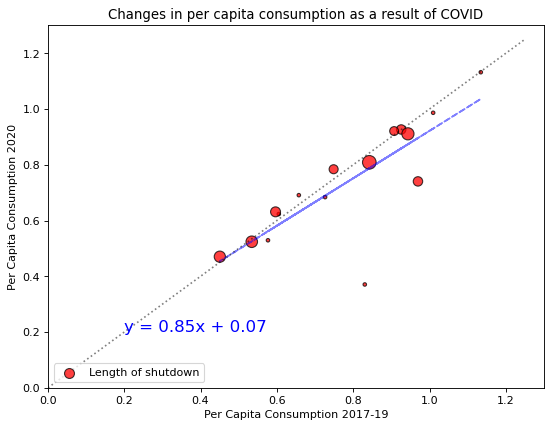

In [16]:
# create the scatterplot for before and after
xval = final_df['Per Capita Before']
yval = final_df['Per Capita After']
sizes = (2*final_df['Shutdown Length'])+10
plt.figure(figsize=(8,6), dpi=80)
plt.ylim(0,1.3)
plt.xlim(0,1.3)
plt.xlabel("Per Capita Consumption 2017-19")
plt.ylabel("Per Capita Consumption 2020")
plt.title("Changes in per capita consumption as a result of COVID")

(slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)
regress_values = xval * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(xval,regress_values,"b--",alpha=0.5)
plt.plot(np.arange(0,1.3,0.05),np.arange(0,1.3,0.05),"k:",alpha=0.5)
plt.annotate(line_eq,(0.2,0.2),fontsize=15,color="blue")

alcConsScatter = plt.scatter(xval, yval, marker="o", facecolors="red", edgecolors="black", s=sizes, alpha=0.75)

plt.legend([alcConsScatter],["Length of shutdown"], loc="lower left",fontsize=10)

alcConsScatter

# save data viz to png
plt.savefig("alcConsScatterRG.png")

In [10]:
# create relevant df for COVID pos rate line graph
covid2020_df = monthrelevant_df.loc[monthrelevant_df['Year'] == 2020,:].reset_index()
covid2020_df = covid2020_df[['State','Month','Positivity Rate']]
covid2020_df = covid2020_df.groupby(['State','Month']).mean()
covid2020_df = covid2020_df.reset_index()
alaskanums = covid2020_df.loc[covid2020_df['State'] == 'Alaska',:]
arkansasnums = covid2020_df.loc[covid2020_df['State'] == 'Arkansas',:]
coloradonums = covid2020_df.loc[covid2020_df['State'] == 'Colorado',:]
connecticutnums = covid2020_df.loc[covid2020_df['State'] == 'Connecticut',:]
floridanums = covid2020_df.loc[covid2020_df['State'] == 'Florida',:]
illinoisnums = covid2020_df.loc[covid2020_df['State'] == 'Illinois',:]
kansasnums = covid2020_df.loc[covid2020_df['State'] == 'Kansas',:]
kentuckynums = covid2020_df.loc[covid2020_df['State'] == 'Kentucky',:]
louisiananums = covid2020_df.loc[covid2020_df['State'] == 'Louisiana',:]
massachusettsnums = covid2020_df.loc[covid2020_df['State'] == 'Massachusetts',:]
missourinums = covid2020_df.loc[covid2020_df['State'] == 'Missouri',:]
ndnums = covid2020_df.loc[covid2020_df['State'] == 'North Dakota',:]
oregonnums = covid2020_df.loc[covid2020_df['State'] == 'Oregon',:]
texasnums = covid2020_df.loc[covid2020_df['State'] == 'Texas',:]
virginianums = covid2020_df.loc[covid2020_df['State'] == 'Virginia',:]
wisconsinnums = covid2020_df.loc[covid2020_df['State'] == 'Wisconsin',:]



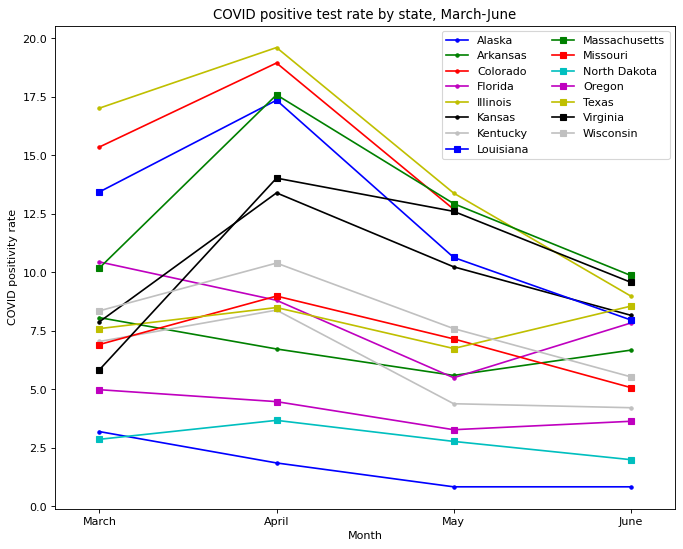

In [11]:
# create line plot
plt.figure(figsize=(10,8), dpi=80)
plt.xlabel("Month")
plt.ylabel("COVID positivity rate")
plt.title("COVID positive test rate by state, March-June")
plt.xlim(2.75,6.25)
plt.xticks(np.arange(3,7, step=1), ['March','April','May','June'])

akplot, = plt.plot([3,4,5,6], alaskanums['Positivity Rate'], color='b', label="Alaska", marker=".")
arplot, = plt.plot([3,4,5,6], arkansasnums['Positivity Rate'], color='g', label="Arkansas", marker=".")
coplot, = plt.plot([3,4,5], coloradonums['Positivity Rate'], color='r', label="Colorado", marker=".")
flplot, = plt.plot([3,4,5,6], floridanums['Positivity Rate'], color='m', label="Florida", marker=".")
ilplot, = plt.plot([3,4,5,6], illinoisnums['Positivity Rate'], color='y', label="Illinois", marker=".")
ksplot, = plt.plot([3,4,5,6], kansasnums['Positivity Rate'], color='k', label="Kansas", marker=".")
kyplot, = plt.plot([3,4,5,6], kentuckynums['Positivity Rate'], color='silver', label="Kentucky", marker=".")
laplot, = plt.plot([3,4,5,6], louisiananums['Positivity Rate'], color='b', label="Louisiana", marker="s")
maplot, = plt.plot([3,4,5,6], massachusettsnums['Positivity Rate'], color='g', label="Massachusetts", marker="s")
moplot, = plt.plot([3,4,5,6], missourinums['Positivity Rate'], color='r', label="Missouri", marker="s")
ndplot, = plt.plot([3,4,5,6], ndnums['Positivity Rate'], color='c', label="North Dakota", marker="s")
orplot, = plt.plot([3,4,5,6], oregonnums['Positivity Rate'], color='m', label="Oregon", marker="s")
txplot, = plt.plot([3,4,5,6], texasnums['Positivity Rate'], color='y', label="Texas", marker="s")
vaplot, = plt.plot([3,4,5,6], virginianums['Positivity Rate'], color='k', label="Virginia", marker="s")
wiplot, = plt.plot([3,4,5,6], wisconsinnums['Positivity Rate'], color='silver', label="Wisconsin", marker="s")

plt.legend(handles=[akplot,arplot,coplot,flplot,ilplot,ksplot,kyplot,laplot,maplot,moplot,ndplot,orplot,txplot,vaplot,wiplot],loc="best",ncol=2)


plt.savefig("covidpositivesRG.png")
plt.show()
